[[0.000e+00 0.000e+00 1.000e-01 1.000e-01 1.000e-01 2.000e-01 2.000e-01
  3.000e-01 3.000e-01 4.000e-01 5.000e-01 5.000e-01 6.000e-01 6.000e-01
  6.000e-01]
 [0.000e+00 1.000e-01 1.000e-01 1.000e-01 2.000e-01 3.000e-01 3.000e-01
  4.000e-01 5.000e-01 7.000e-01 8.000e-01 8.000e-01 9.000e-01 9.000e-01
  9.000e-01]
 [1.000e-01 1.000e-01 1.000e-01 2.000e-01 3.000e-01 4.000e-01 5.000e-01
  7.000e-01 8.000e-01 1.000e+00 1.200e+00 1.400e+00 1.500e+00 1.500e+00
  1.500e+00]
 [1.000e-01 1.000e-01 2.000e-01 3.000e-01 4.000e-01 6.000e-01 8.000e-01
  1.000e+00 1.300e+00 1.600e+00 2.000e+00 2.300e+00 2.400e+00 2.500e+00
  2.400e+00]
 [1.000e-01 2.000e-01 3.000e-01 4.000e-01 6.000e-01 8.000e-01 1.100e+00
  1.500e+00 2.000e+00 2.600e+00 3.200e+00 3.700e+00 4.000e+00 4.200e+00
  4.000e+00]
 [1.000e-01 2.000e-01 3.000e-01 5.000e-01 8.000e-01 1.100e+00 1.600e+00
  2.300e+00 3.100e+00 4.000e+00 5.000e+00 5.900e+00 6.600e+00 6.800e+00
  6.600e+00]
 [2.000e-01 3.000e-01 4.000e-01 7.000e-01 1.000e+00 1.500e

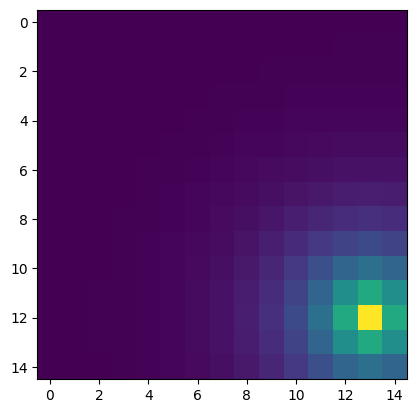

In [4]:
%reload_ext autoreload
%autoreload 2

# import sys
import numpy as np
# numpy.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold= np.inf)

from Grid import Grid, Point
from Engine import Engine
import initial_states

init_config = {'tip_cells': [Point(1,1),Point(3,3), Point(10,1)],
               'attractor_cells': initial_states.Attractors_small2}
grid = Grid(width=15, height=15, init_config=init_config)
engine = Engine(init_grid=grid, generations=100)
engine.run()

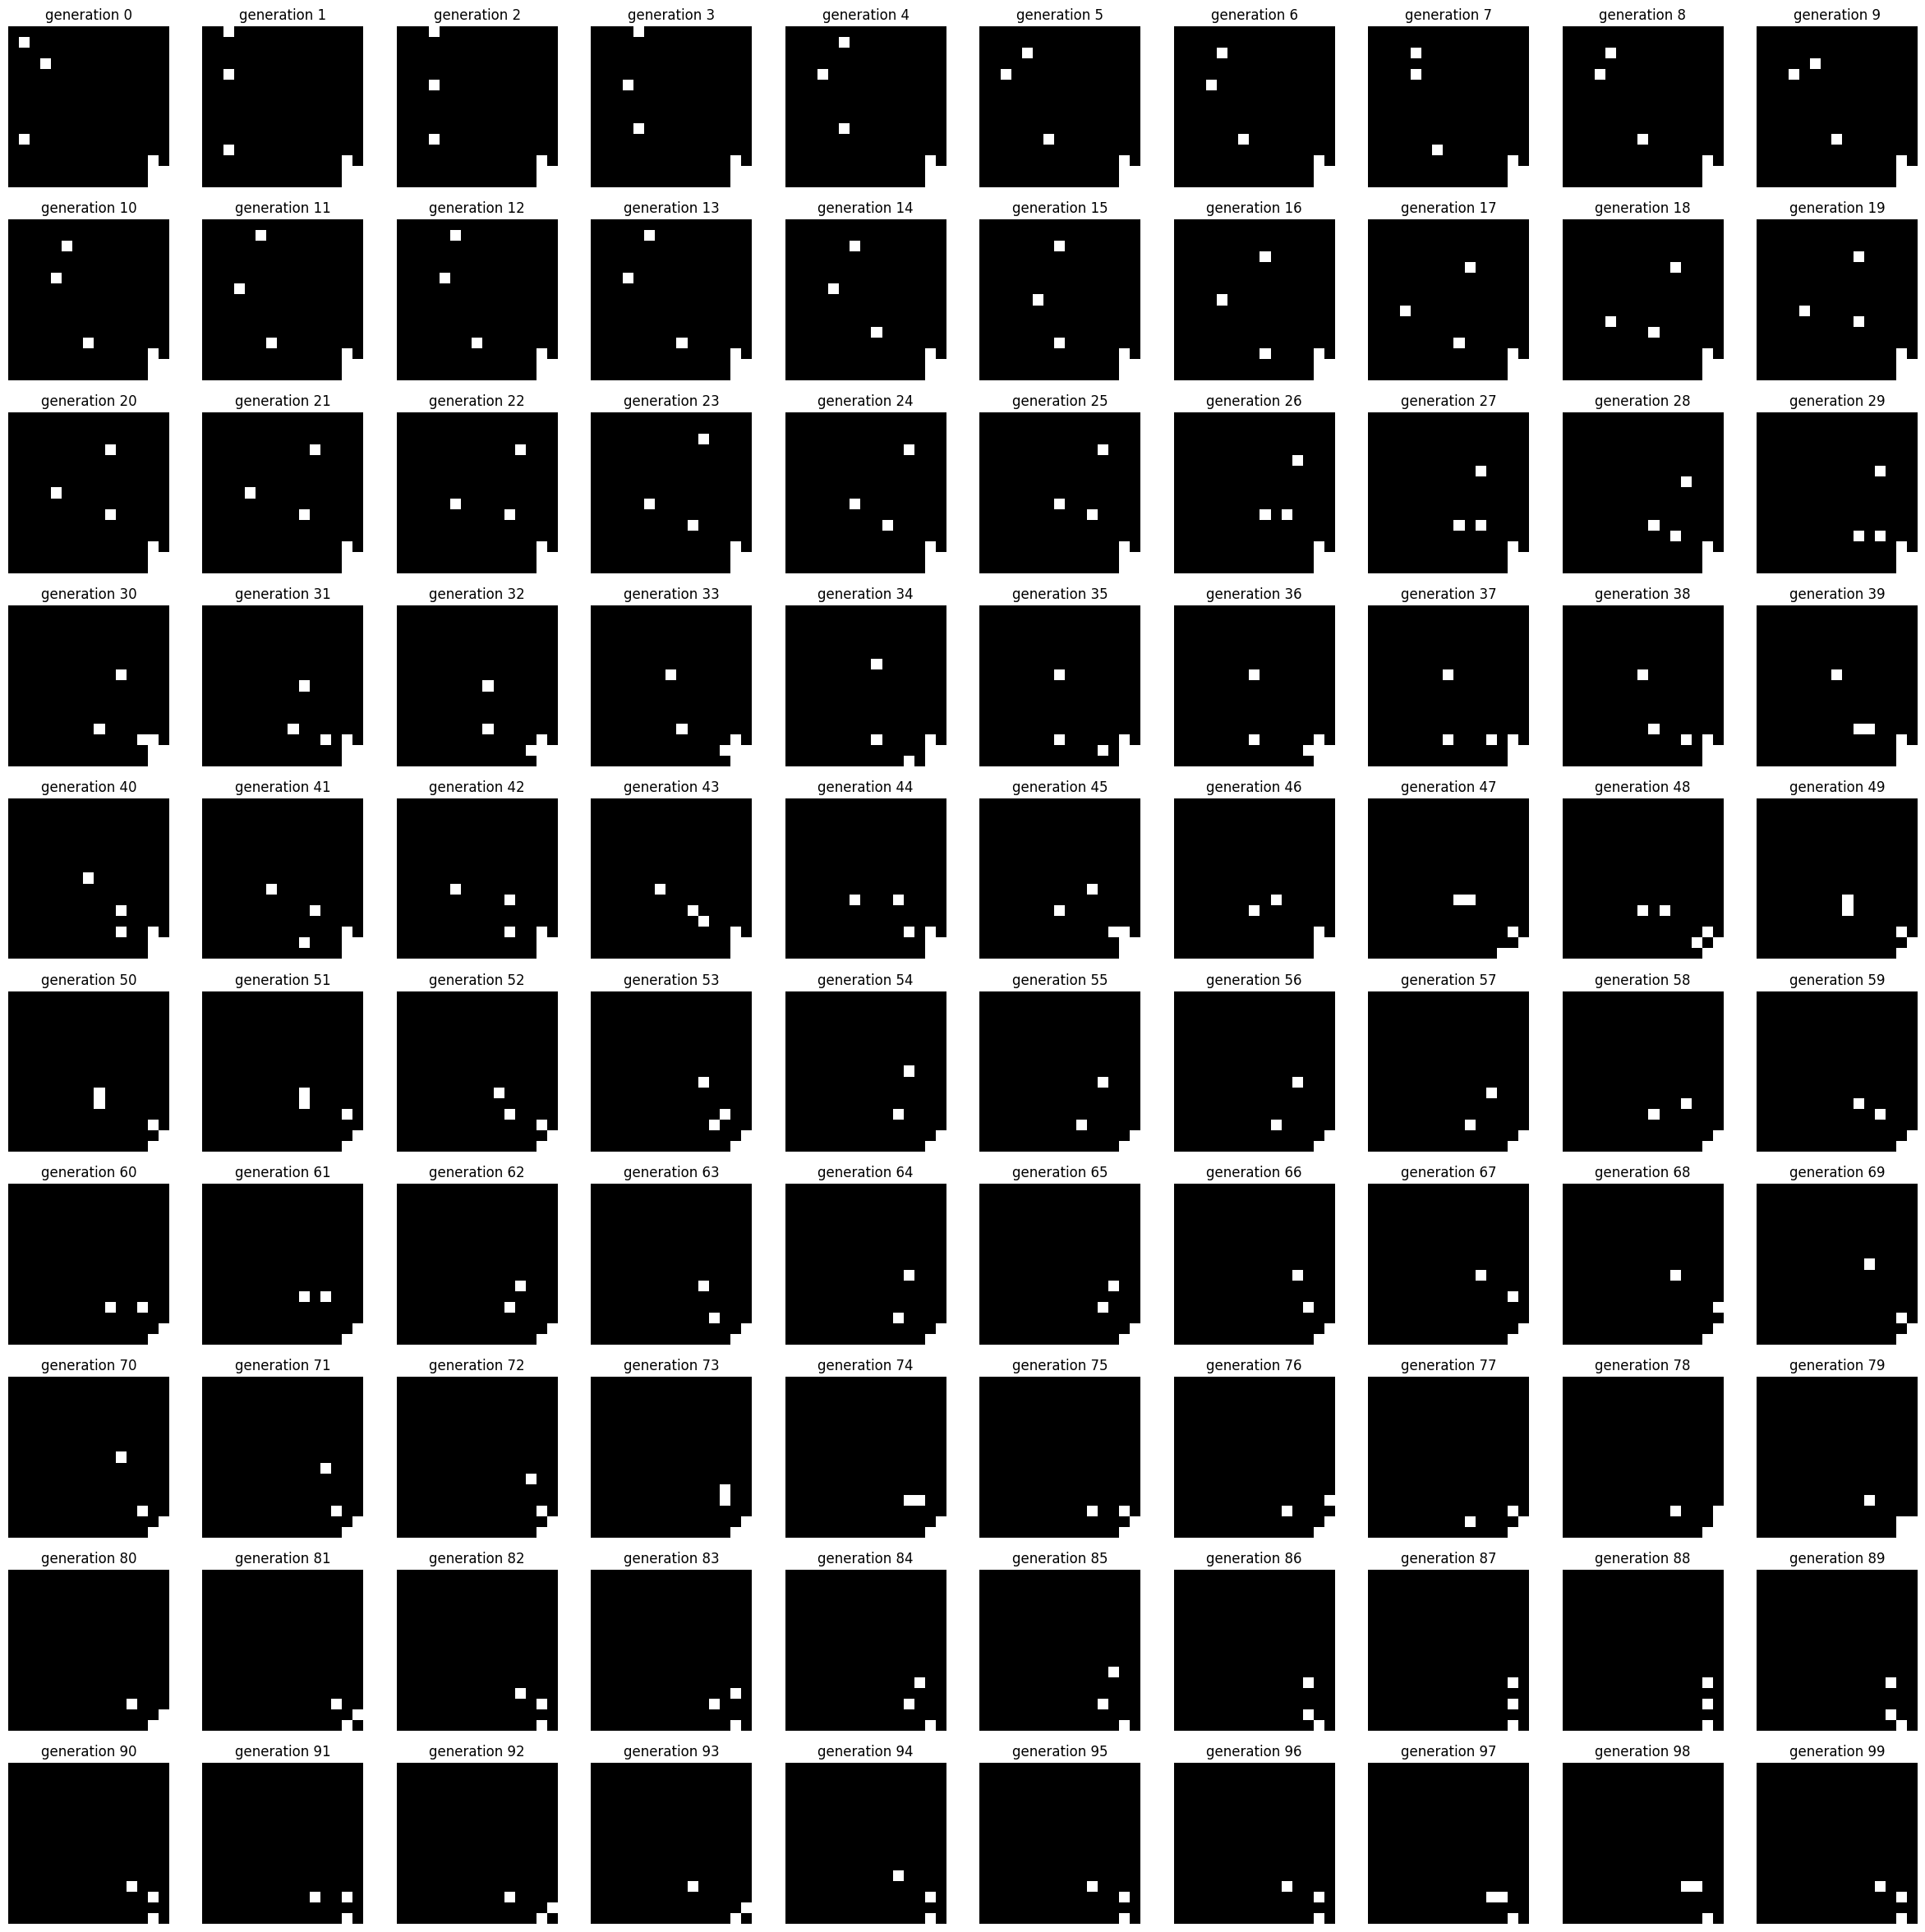

In [5]:
engine.visualize()

In [9]:
import matplotlib.pyplot as plt
def generate_concentration_gradient(source_location, matrix_size, decay_rate, initial_concentration):
    """
    Generates a matrix representing the concentration gradient from a single source
    
    Parameters:
        - source_location (tuple): The (x, y) coordinates of the source
        - matrix_size (int): The size of the matrix (matrix is square, so this is the width and height)
        - decay_rate (float): The rate at which the concentration decreases as distance from the source increases
        - initial_concentration (float): The concentration of the source
        
    Returns:
        - concentration_matrix (2D numpy array): The matrix representing the concentration gradient
    """
    x, y = source_location
    concentration_matrix = np.zeros((matrix_size, matrix_size))
    for i in range(matrix_size):
        for j in range(matrix_size):
            distance = ((i - x) ** 2 + (j - y) ** 2) ** 0.5
            concentration = initial_concentration * np.exp(-decay_rate * distance)
            concentration_matrix[i, j] = concentration
    return concentration_matrix

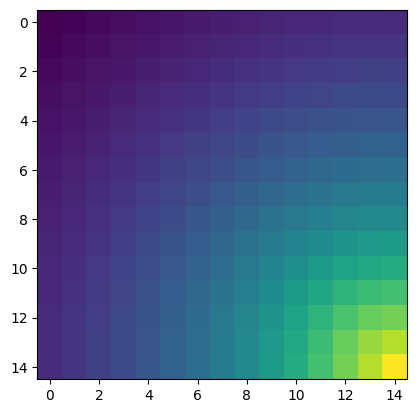

In [13]:
source_location = (14, 14)
matrix_size = 15
decay_rate = 0.1
initial_concentration = 2

concentration_matrix = generate_concentration_gradient(source_location, matrix_size, decay_rate, initial_concentration)
plt.imshow(concentration_matrix)